In [573]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats, integrate
import datetime
%matplotlib inline

In [574]:
bilibili_raw_data = pd.read_json('raw_data/bilibiliRawData.json')
youku_raw_data = pd.read_json('raw_data/youkuRawData.json')
iqiyi_raw_data = pd.read_json('raw_data/iqiyi_raw_data.json')

iqiyi_raw_data.pop('tvId')
iqiyi_raw_data.pop('vid')
youku_raw_data.pop('id')
print('data load done')
print('bilibili:',len(bilibili_raw_data))
print('youku:',len(youku_raw_data))
print('iqiyi:',len(iqiyi_raw_data))

data load done
bilibili: 64
youku: 1721
iqiyi: 603


In [575]:
def time_parse(time_str):
    if time_str is None:
        return 0
    time = time_str.split(':')
    time = str(int(time[0])*60+int(time[1]))
    return int(time)

bilibili_raw_data.duration = bilibili_raw_data.duration.apply(time_parse)


In [576]:
bilibili_raw_data.sort_values(by='duration',ascending=False).head(5)

,aid,comment,danmu,duration,issueTime,like,playNum,title
29,2798895,6351,511704,314103,2015-08-25T00:50,135777,14817836,【韩语中字】搞笑一家人/无法阻挡的highkick 167集+5集花絮+3集特辑_完结剧集_...
47,4648456,268,12900,80821,2016-05-14T14:00,9483,537409,【韩剧】「姜栋元」1%的可能性（26集全）_完结剧集_电视剧_bilibili_哔哩哔哩
22,5775603,250,1859,73680,None,6487,39709,哔哩哔哩 (゜-゜)つロ 干杯~-bilibili
39,1731533,559,40130,34348,2014-11-21T13:27,42118,1599877,【美剧/鉴谎】LIE TO ME 第一季【人人中英字幕】_完结剧集_电视剧_bilibili...
43,6614720,80,944,15240,None,1002,162185,【战争/剧情】印第安纳波利号：勇者无惧 2016【原声中字】_欧美电影_电影_bilibil...


In [577]:
def num_parse(num_str):
    if num_str is None:
        return 0
    num = ''.join(num_str.split(','))
    return int(num)
youku_raw_data.playNum = youku_raw_data.playNum.apply(num_parse)
youku_raw_data.like = youku_raw_data.like.apply(num_parse)

In [578]:
youku_raw_data.head()

,comment,duration,id2,like,playNum,title
0,14,276.55,XODU5NzEwOTc2,41,11225,Pumped Up Kicks - Cajon Cover (Live!) by Turbo...
1,1,288.07,XNjk0MTc2NTY4,12,4789,yadikar38(3)—在线播放—优酷网，视频高清在线观看
2,2,218.00,XMTQ0ODA0NTc4OA==,205,67823,kazakqa nahxa mung umak alo—在线播放—优酷网，视频高清在线观看
3,0,90.00,XMTQ3NzEwOTM5Mg==,0,819,凯南腥红之月主题皮肤 凯南最帅皮肤全特效堪称完美—在线播放—优酷网，视频高清在线观看
4,956,591.00,XMTU3ODgyNDc2OA==,27766,17589908,【创意玩具】培乐多黏土DIY模具制作 冰淇淋健达奇趣蛋视频—在线播放—优酷网，视频高清在线观看


In [579]:
youku_raw_data.sort_values(by='comment',ascending=False).head(5)

,comment,duration,id2,like,playNum,title
839,104303,2665.14,XMTY5NDg2MzY5Ng==,1649097,1589641486,微微一笑很倾城 01—在线播放—《微微一笑很倾城》—电视剧—优酷网，视频高清在线观看
780,51724,4982.21,XMTUzODUzNDM2MA==,342597,214714289,极限挑战 160417—在线播放—《极限挑战 第二季》—综艺—优酷网，视频高清在线观看
328,49993,2657.38,XMTY5NDg3NDE2OA==,821875,1255397357,微微一笑很倾城 02—在线播放—《微微一笑很倾城》—电视剧—优酷网，视频高清在线观看
1628,44058,3565.98,XODI1MzY1NDc2,450605,175338955,匹诺曹 01—在线播放—《匹诺曹》—电视剧—优酷网，视频高清在线观看
1360,43278,5905.16,XNzIyNjI0ODc2,297717,99799110,同桌的妳—在线播放—《同桌的妳》—电影—优酷网，视频高清在线观看


In [580]:
iqiyi_raw_data.issueTime = iqiyi_raw_data.issueTime.apply(lambda x: int(x/1000))
iqiyi_raw_data.sort_values(by='duration',ascending=False).head(10)

,comment,duration,id,issueTime,like,playNum,title
470,637,59552,/w_19rti6jds5,1439981807,22118,14247614,盗墓笔记第二季 完整版全集1-51集l-生活-高清视频-爱奇艺
159,51,9612,/v_19rrnz0khk,1419851356,420,690655,白蛇传 1980-电影-高清完整版在线观看–爱奇艺
284,801,9387,/v_19rrkf6b9s,1478802842,4762,4712129,那小子真拽-电影-高清完整版在线观看–爱奇艺
108,3394,8479,/v_19rrodq1gc,1442415603,45218,63377514,复仇者联盟2：奥创纪元-电影-高清完整版在线观看–爱奇艺
309,16193,8201,/v_19rrl9ga1w,1475066838,222894,240572439,老炮儿-电影-高清完整版在线观看–爱奇艺
320,788,8183,/v_19rrhj1png,1405545451,15298,22941688,皇室风流史-电影-高清完整版在线观看–爱奇艺
161,1222,8096,/v_19rri0zlb0,1469977216,4221,21588381,谍影重重4-电影-高清完整版在线观看–爱奇艺
243,983,7982,/v_19rrlmwrz8,1465956466,6730,14711273,热血高校2-电影-高清完整版在线观看–爱奇艺
444,7658,7970,/v_19rrho32zk,1458557437,75557,48100606,这个杀手不太冷-电影-高清完整版在线观看–爱奇艺
505,1389,7817,/v_19rrifvgmc,1478802403,17006,7365728,圣杯神器：骸骨之城-电影-高清完整版在线观看–爱奇艺


## 视频长度
三个视频网站都存在部分长度特别长的情况，b站特别长的视频是因为返回了整部电视剧的长度，而iqiyi甚至存在《盗墓笔记1-51集》这种视频，最终我们决定不对视频长度进行截断处理，对比也发现，截断前后对统计图的整体趋势影响不大

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


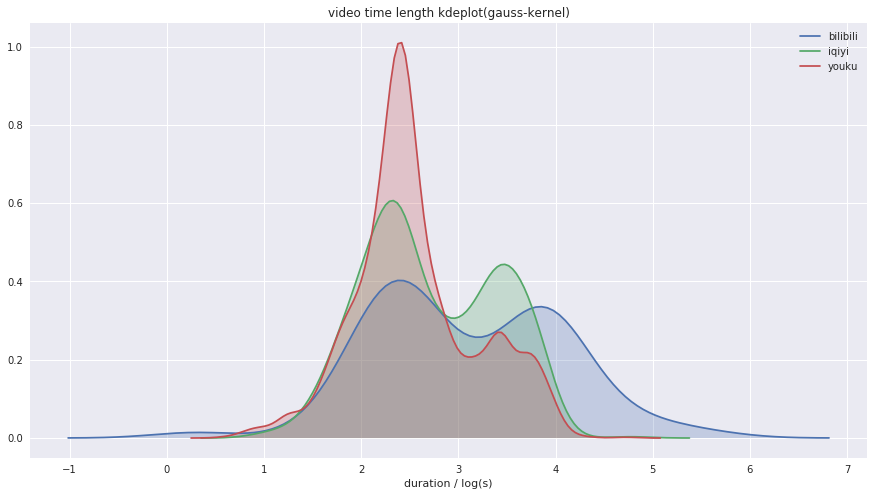

In [564]:
# 
# CUT = 60*60*5 
# bilibili_raw_data.duration[bilibili_raw_data.duration>CUT] = CUT
# iqiyi_raw_data.duration[iqiyi_raw_data.duration>CUT] = CUT
# youku_raw_data.duration[youku_raw_data.duration>CUT] = CUT

def _log(x):
    return math.log(x+2)/math.log(10)

plt.figure(figsize=(15,8))

sns.kdeplot(bilibili_raw_data.duration.apply(_log),shade=True, label='bilibili')
sns.kdeplot(iqiyi_raw_data.duration.apply(_log),shade=True, label='iqiyi')
sns.kdeplot(youku_raw_data.duration.apply(_log),shade=True, label='youku')
plt.legend();
plt.xlabel('duration / log(s)')
plt.title('video time length kdeplot(gauss-kernel)')
plt.savefig('img/video_duration.jpg')
plt.show()

## 评论情况

显然，三个网站中，bilibili的用户形成了较多的评论，而传统的视频网站更加注重内容发布，而在与用户交互方面不如bilibili，
但是另一方面，youku，iqiyi由于其庞大的用户群体上一旦出现热门视频，相应评论数将飞速攀升，这一点，是bilibi这种小众网站远远比不上的。


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


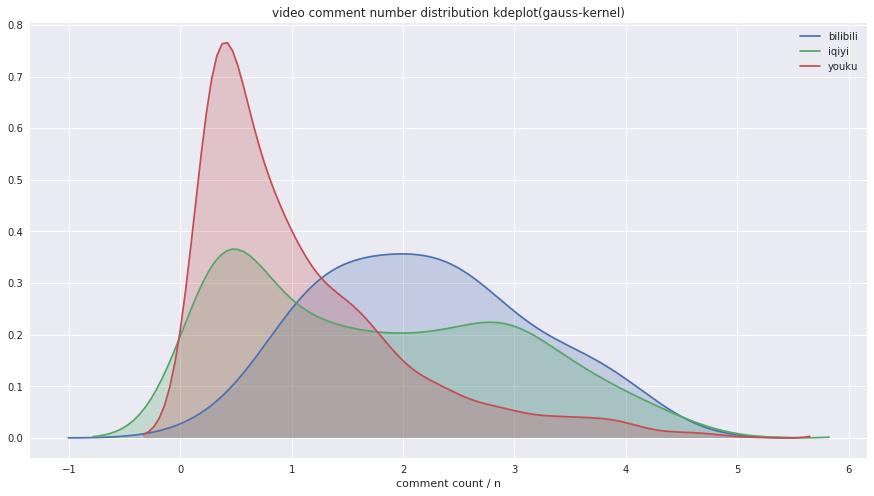

In [565]:
plt.figure(figsize=(15,8))

def _log(x):
    return math.log(x+2)/math.log(10)

sns.kdeplot(bilibili_raw_data.comment.apply(_log),shade=True, label='bilibili')
sns.kdeplot(iqiyi_raw_data.comment.apply(_log),shade=True, label='iqiyi')
sns.kdeplot(youku_raw_data.comment.apply(_log),shade=True, label='youku')
plt.legend();
plt.xlabel('comment count / n')
plt.title('video comment number distribution kdeplot(gauss-kernel)')
plt.savefig('img/video_comment_nolog.jpg')
plt.show()

# 播放数

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


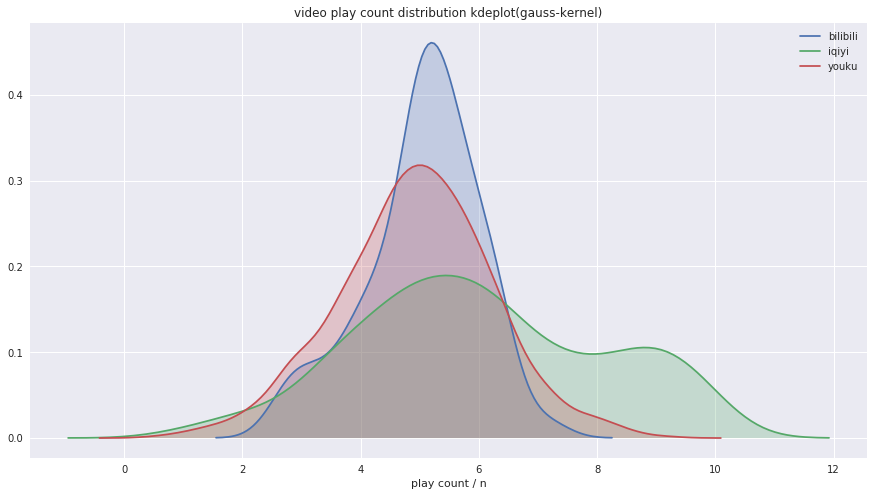

In [566]:
plt.figure(figsize=(15,8))

sns.kdeplot(bilibili_raw_data.playNum.apply(_log),shade=True, label='bilibili')
sns.kdeplot(iqiyi_raw_data.playNum.apply(_log),shade=True, label='iqiyi')
sns.kdeplot(youku_raw_data.playNum.apply(_log),shade=True, label='youku')
plt.legend();
plt.xlabel('play count / n')
plt.title('video play count distribution kdeplot(gauss-kernel)')

plt.savefig('img/video_playNum.jpg')
plt.show()

## 播放数-评论数

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


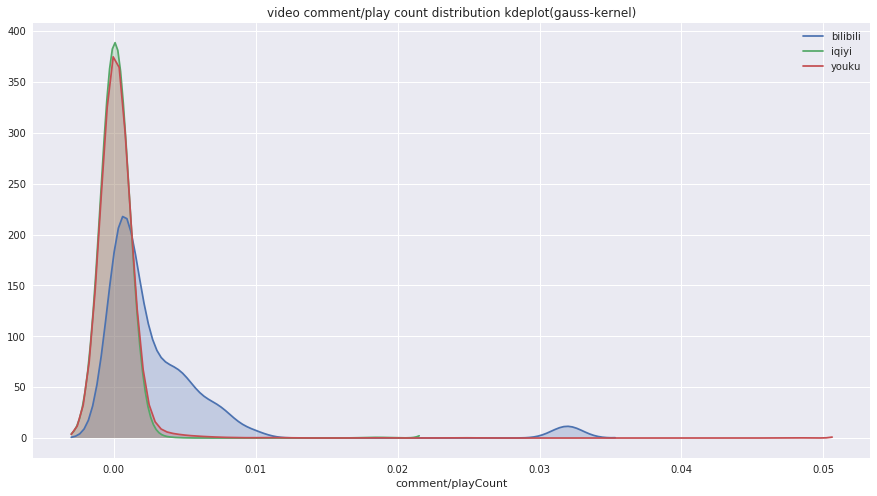

In [567]:
plt.figure(figsize=(15,8))

def _log1(x):
    return x
    return math.log(x+2) / math.log(10)

def _log2(x):
    return x
    return math.log(x+2) / math.log(10)

bw = 0.001

sns.kdeplot(bilibili_raw_data.comment.apply(_log2)/bilibili_raw_data.playNum.apply(_log1),bw=bw,shade=True, label='bilibili')
# cmap = sns.cubehelix_palette(start=2, light=1, as_cmap=True)
sns.kdeplot(iqiyi_raw_data.comment.apply(_log2)/iqiyi_raw_data.playNum.apply(_log1),bw=bw,shade=True, label='iqiyi')
# cmap = sns.cubehelix_palette(start=, light=1, as_cmap=True)
sns.kdeplot(youku_raw_data.comment.apply(_log2)/youku_raw_data.playNum.apply(_log1),bw=bw,shade=True, label='youku')
plt.legend();
plt.xlabel('comment/playCount')
plt.title('video comment/play count distribution kdeplot(gauss-kernel)')

plt.savefig('img/video_count-playNum.jpg')
plt.show()

## issut Time相关分析

In [640]:
bilibili_visit_data = pd.read_csv('raw_data/bilibili_aid.csv',names=['aid','url','time'])
youku_visit_data   = pd.read_csv('raw_data/youku_id.csv',names=['id','url','time'])
iqiyi_visit_data   = pd.read_csv('raw_data/iqiyi_id.csv',names=['id','url','time'])

In [641]:
bilibili_visit_data = pd.merge(bilibili_visit_data,bilibili_raw_data.loc[:,['aid','issueTime','playNum']],how='left',on='aid')
iqiyi_visit_data = pd.merge(iqiyi_visit_data,iqiyi_raw_data.loc[:,['id','issueTime','playNum']],how='left',on='id')
iqiyi_visit_data.issueTime = iqiyi_visit_data.issueTime.fillna(iqiyi_visit_data.issueTime.mean())

In [642]:
bilibili_visit_data.issueTime = bilibili_visit_data.issueTime.apply(pd.to_datetime)
bilibili_visit_data.time = bilibili_visit_data.time.apply(pd.to_datetime)
iqiyi_visit_data.issueTime = iqiyi_visit_data.issueTime.apply(pd.datetime.fromtimestamp)
iqiyi_visit_data.issueTime = iqiyi_visit_data.issueTime.apply(pd.to_datetime)
iqiyi_visit_data.time = iqiyi_visit_data.time.apply(pd.to_datetime)

In [643]:
bilibili_visit_data['time_delta'] = bilibili_visit_data.time - bilibili_visit_data.issueTime
iqiyi_visit_data['time_delta'] = iqiyi_visit_data.time - iqiyi_visit_data.issueTime


/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


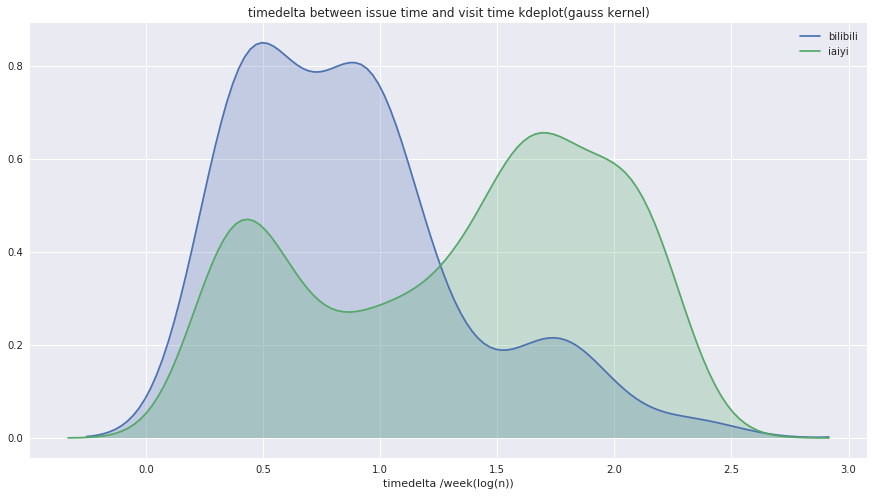

In [644]:
plt.figure(figsize=(15,8))

# sns.kdeplot(bilibili_raw_data.playNum.apply(_log),shade=True, label='bilibili')
# sns.kdeplot(iqiyi_raw_data.playNum.apply(_log),shade=True, label='iqiyi')
# sns.kdeplot(youku_raw_data.playNum.apply(_log),shade=True, label='youku')
def _log3(x):
    try:
        return math.log(x+2)/math.log(10)
    except:
        return np.NaN
sns.kdeplot(bilibili_visit_data.time_delta.apply(lambda x: _log3(x/np.timedelta64(1,'W'))),shade=True,label='bilibili')
sns.kdeplot(iqiyi_visit_data.time_delta.apply(lambda x: _log3(x/np.timedelta64(1,'W'))),shade=True,label='iaiyi')

plt.xlabel('timedelta /week(log(n))')
plt.title('timedelta between issue time and visit time kdeplot(gauss kernel)')
plt.savefig('img/video_time_delta.jpg')
plt.show()


## 发布、访问时间差-评论数

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


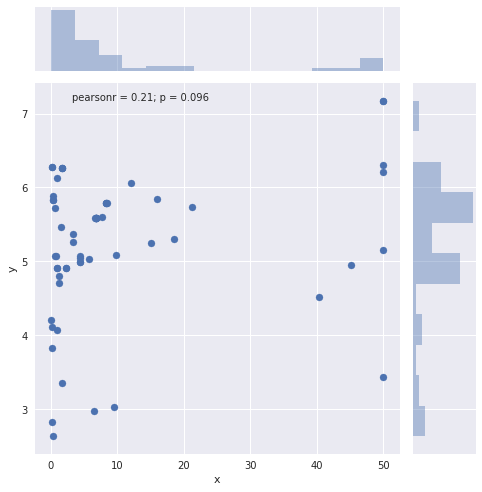

In [667]:
def __log(x):
#     return min(x,100000000)
    return math.log(x) / math.log(10)

def __log2(x):
    return min(x,50)
data1 = pd.DataFrame({'x':bilibili_visit_data.time_delta.apply(lambda x: __log2(x/np.timedelta64(1,'W'))),'y':bilibili_visit_data.playNum.apply(__log)},index=bilibili_visit_data.index)

data2 = pd.DataFrame({'x':iqiyi_visit_data.time_delta.apply(lambda x: x/np.timedelta64(1,'W')),'y':iqiyi_visit_data.playNum.apply(__log)},index=iqiyi_visit_data.index)
sns.set(style="darkgrid", color_codes=True)

tips = sns.load_dataset("tips")

sns.jointplot("x", "y", data=data1,size=7)

plt.show()

In [639]:
?sns.jointplot